# KNN

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

### Load Dataset

In [2]:
iris = pd.read_csv("Iris.csv")

# Drop unnecessary columns
iris.drop('Id',inplace=True,axis=1)

In [3]:
iris.head().style.background_gradient(sns.color_palette("YlOrBr", as_cmap=True))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


### Main Code

In [4]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [5]:
fig = px.pie(iris, 'Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '],title='Data Distribution',template='plotly_dark')
fig.show()

In [6]:
fig = px.box(data_frame=iris, x='Species',y='SepalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [7]:
fig = px.histogram(data_frame=iris, x='SepalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=50)
fig.show()

In [8]:
fig = px.box(data_frame=iris, x='Species',y='SepalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [9]:
fig = px.histogram(data_frame=iris, x='SepalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=30)
fig.show()

In [10]:
fig = px.box(data_frame=iris, x='Species',y='PetalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [11]:
fig = px.histogram(data_frame=iris, x='PetalLengthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=30)
fig.show()

In [12]:
fig = px.box(data_frame=iris, x='Species',y='PetalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',orientation='v')
fig.show()

In [13]:
fig = px.histogram(data_frame=iris, x='PetalWidthCm',color='Species',color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',nbins=30)
fig.show()

In [14]:
fig = px.scatter(data_frame=iris, x='SepalLengthCm',y='SepalWidthCm',color='Species',size='PetalLengthCm', color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',)
fig.show()

In [15]:
fig = px.scatter(data_frame=iris, x='PetalLengthCm',y='PetalWidthCm',color='Species',size='SepalLengthCm', color_discrete_sequence=['#ffffd4 ','#fe9929 ','#993404 '], template='plotly_dark',)
fig.show()

In [16]:
class KNN:

    def __init__(self, neighbour: int) -> None:
        self.neighbour = neighbour

    def euclidean_distance(self, x1: int, x2: int):
        return np.linalg.norm(x1 - x2)
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):

        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X: np.ndarray):

        predictions = []

        for i in X:
            prediction = self._predict(i)
            predictions.append(prediction)
        
        return np.array(predictions)
    
    def _predict(self, x: np.ndarray):

        distances = []

        for X_train in self.X_train:
            distance = self.euclidean_distance(x, X_train)
            distances.append(distance)

        distances = np.array(distances)

        n_neighbours_idxs = np.argsort(distances)[:self.neighbour]

        labels = self.y_train[n_neighbours_idxs]
        labels = list(labels)

        most_occuring_value = max(labels, key=labels.count)

        return most_occuring_value

In [17]:
def test_train_split(X: np.ndarray, y, random_state=42, test_size=0.2):

    n = X.shape[0]
    np.random.seed(random_state)

    shuffled_indices = np.random.permutation(np.arange(n))

    test_size = int(n * test_size)

    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test = test_train_split(X.values, y.values, test_size=0.2, random_state=42)

In [19]:
model = KNN(7)
model.fit(X_train, y_train)

In [20]:
def compute_accuracy(y_true, y_pred):

    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 

In [21]:
predictions = model.predict(X_test)
accuracy = compute_accuracy(y_test, predictions)
print(f" our model got accuracy score of : {accuracy * 100}")    

 our model got accuracy score of : 96.66666666666667


# Expectation-Maximization

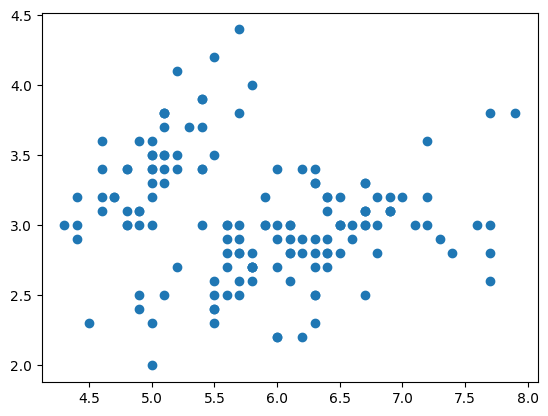

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# load the iris dataset
iris = datasets.load_iris()

# select first two columns 
X = iris.data[:, :2]

# turn it into a dataframe
d = pd.DataFrame(X)

# plot the data
plt.scatter(d[0], d[1])
plt.show()

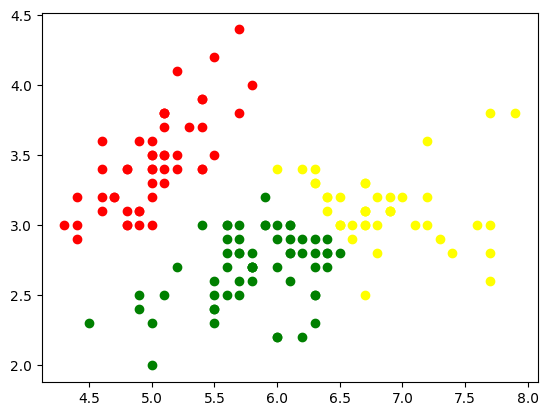

In [23]:
gmm = GaussianMixture(n_components = 3)

# Fit the GMM model for the dataset 
# which expresses the dataset as a 
# mixture of 3 Gaussian Distribution
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()

In [24]:
# print the converged log-likelihood value
print(gmm.lower_bound_)

# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)

-1.4987505566235166
8


# DBSCAN

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [26]:
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
					cluster_std=0.50, random_state=0)

['y', 'b', 'g', 'r']


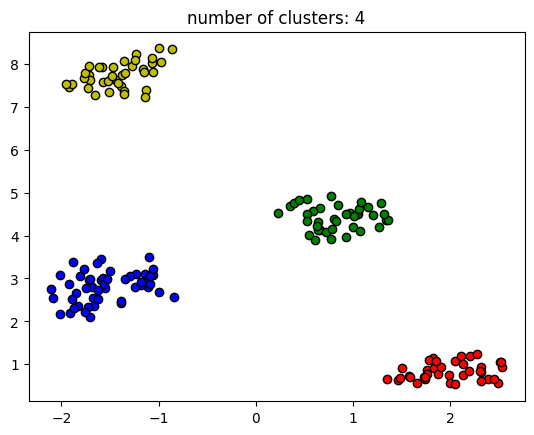

In [27]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


In [28]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31
